# Logistic function

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

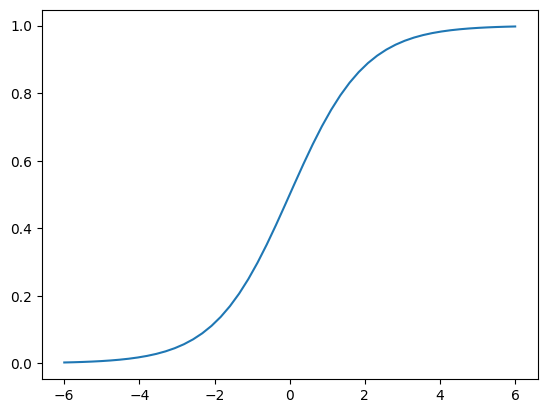

In [10]:
def logistic(x):
    return np.exp(x) / (1 + np.exp(x))
x = np.linspace(-6,6,50, dtype=float)
y = logistic(x)
plt.plot(x,y)

In [14]:
data=pd.read_csv('Day6.csv')
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [16]:
data.shape

(400, 5)

In [17]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [22]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: xlabel='Purchased', ylabel='count'>

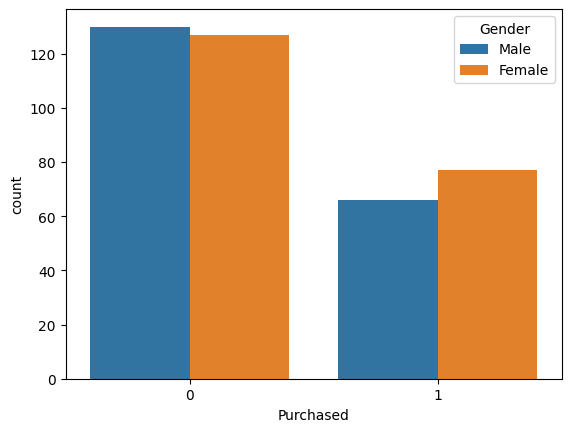

In [24]:
sns.countplot(x=data['Purchased'], hue=data['Gender'])

In [25]:
# male are not doing much shopping comapred to females
# in purchase female count is more
# in non purchase, male count is more

C:\Users\sai\AppData\Local\Temp\ipykernel_1296\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

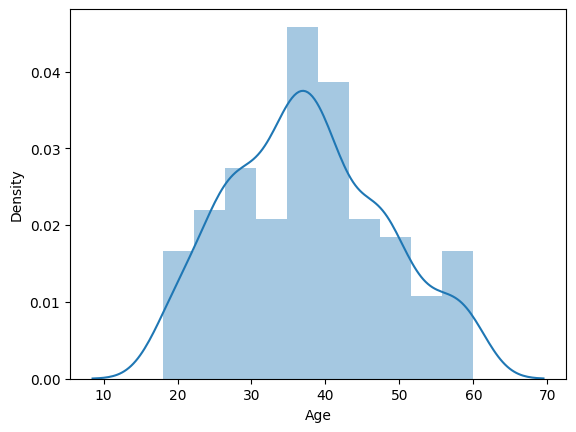

In [28]:
sns.distplot(data['Age'])

In [ ]:
# age range of 35 to 45 are more likely to purchase computers

C:\Users\sai\AppData\Local\Temp\ipykernel_1296\3321298747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

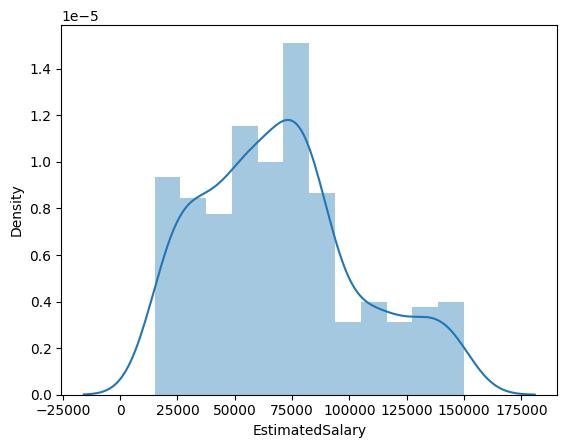

In [29]:
sns.distplot(data['EstimatedSalary'])

In [30]:
# people with salary of 75k are more likely to buy computer

In [32]:
# independent variables
x = data[['Age','EstimatedSalary']]

# dependent variables
y = data['Purchased']


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [34]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [35]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [37]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [38]:
x_train

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [39]:
x_test

array([[-0.64807267,  0.53080315],
       [ 0.07535729, -0.59737588],
       [-0.19592895,  0.16490725],
       [-0.64807267,  0.28687255],
       [-0.19592895, -0.59737588],
       [-0.9193589 , -1.51211563],
       [-0.55764392, -1.66457226],
       [-0.1055002 ,  2.26880869],
       [-1.7332176 , -0.04853203],
       [ 0.88921599, -0.81081516],
       [-0.64807267, -0.6278672 ],
       [-0.82893016, -0.44491925],
       [-0.01507146, -0.44491925],
       [ 0.16578603,  0.2258899 ],
       [-1.55236011,  0.50031183],
       [-0.46721518,  1.44554291],
       [-0.01507146,  0.2258899 ],
       [-1.64278886,  0.4698205 ],
       [ 1.61264594,  1.84193014],
       [-0.19592895, -1.45113298],
       [-0.19592895, -0.68884985],
       [ 0.88921599,  2.26880869],
       [ 0.34664352, -0.56688455],
       [ 0.88921599,  1.07964701],
       [-1.28107388, -1.26818503],
       [ 1.07007347,  2.17733471],
       [-0.82893016,  0.53080315],
       [-0.73850141,  0.31736388],
       [-0.01507146,

In [ ]:
# Model-building



In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [41]:
# prediction

In [42]:
prediction = model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [ ]:
# check performance of the model

In [43]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
# confusion matrics

In [44]:
confusion_matrix(y_test,prediction)

array([[75,  4],
       [ 9, 32]], dtype=int64)

In [ ]:
# 75 are purchased
# 32 are not purchased
# 4 and 9 are error

In [45]:
print(accuracy_score(y_test,prediction))

0.8916666666666667


In [46]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        79
           1       0.89      0.78      0.83        41

    accuracy                           0.89       120
   macro avg       0.89      0.86      0.88       120
weighted avg       0.89      0.89      0.89       120



In [ ]:
# Q.  based on cutoff predict whether you will get admission or not

In [47]:
df=pd.read_csv('admissions.csv')
df

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894
...,...,...,...
639,1,3.381359,720.718438
640,1,3.083956,556.918021
641,1,3.114419,734.297679
642,1,3.549012,604.697503


In [48]:
df.shape

(644, 3)

In [49]:
df.dtypes

admit      int64
gpa      float64
gre      float64
dtype: object

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   644 non-null    int64  
 1   gpa     644 non-null    float64
 2   gre     644 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


In [51]:
df.describe()

,admit,gpa,gre
count,644.000000,644.000000,644.000000
mean,0.378882,3.239936,612.923057
std,0.485486,0.291907,76.637990
min,0.000000,2.177100,390.363563
25%,0.000000,3.045036,560.596793
50%,0.000000,3.234650,612.104848
75%,1.000000,3.448415,663.094697
max,1.000000,4.000000,800.000000


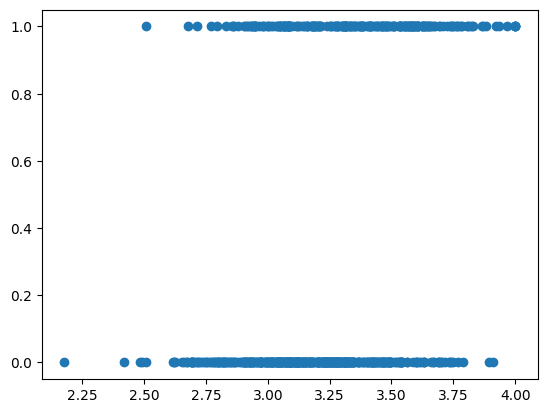

In [58]:
plt.scatter(df['gpa'],df['admit'])

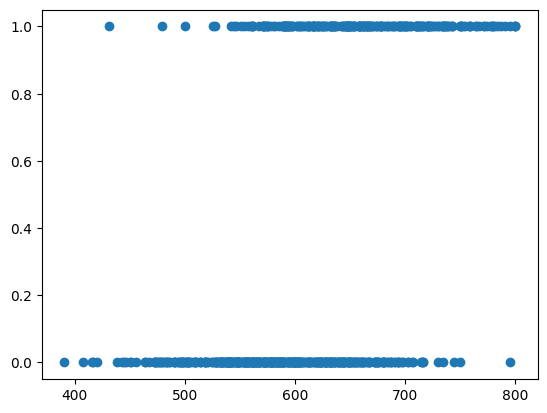

In [57]:
plt.scatter(df.gre,df.admit)

In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df[["gpa"]],df[["admit"]])

LinearRegression()

In [61]:
# Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(df[["gpa"]],df[["admit"]])

C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [63]:
pred_prob_gpa = logic.predict_proba(df[['gpa']])

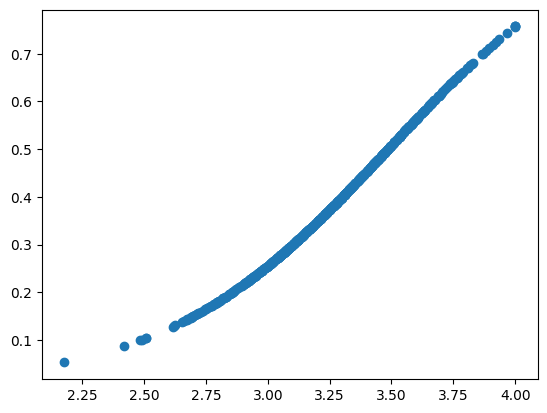

In [65]:
plt.scatter(df['gpa'],pred_prob_gpa[:,1])

In [66]:
fitted_gpa = logic.predict(df[['gpa']])

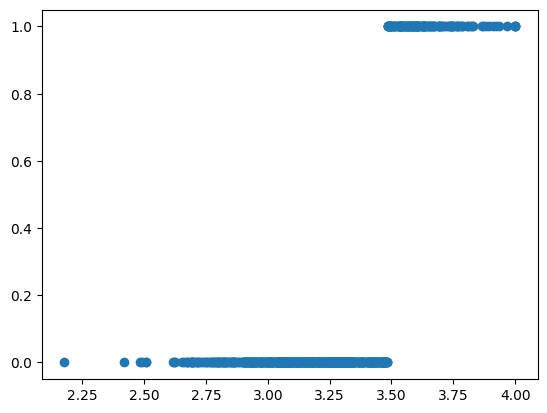

In [67]:
plt.scatter(df['gpa'],fitted_gpa)

In [ ]:
# you have to get more than 3.50 gpa to get admission 

In [68]:
lm = LinearRegression()
lm.fit(df[["gre"]],df[["admit"]])

LinearRegression()

In [69]:
logic = LogisticRegression()
logic.fit(df[["gre"]],df[["admit"]])

C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [70]:
pred_prob_gre = logic.predict_proba(df[['gre']])

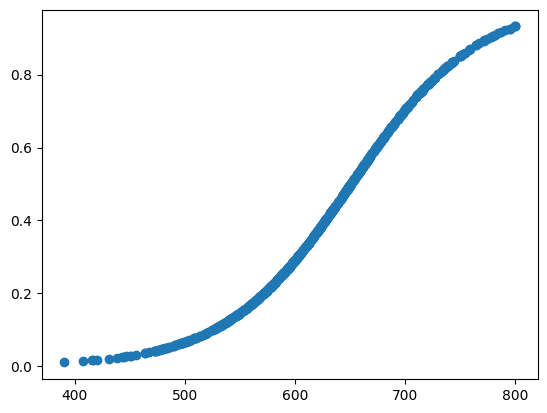

In [71]:
plt.scatter(df['gre'],pred_prob_gre[:,1])

In [72]:
fitted_gre = logic.predict(df[['gre']])

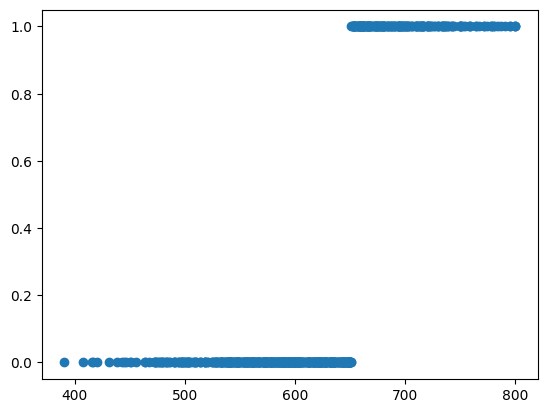

In [73]:
plt.scatter(df['gre'],fitted_gre)

In [74]:
# you have to score more than 650 mks to get admission

# Comparing the performance model

In [88]:
sum((fitted_gpa == df['admit'])/df.shape[0])

0.6847826086956521

In [89]:
sum((fitted_gre == df['admit'])/df.shape[0])

0.7267080745341614

# Combine model

In [80]:
logic2 = LogisticRegression()
logic2.fit(df[['gpa','gre']],df['admit'])

LogisticRegression()

In [81]:
pred_prob_gregpa = logic2.predict_log_proba(df[['gpa','gre']])

In [82]:
fitted_gregpa = logic2.predict(df[['gpa','gre']])

In [85]:
# accuracy
sum((fitted_gregpa == df['admit'])/df.shape[0]) 

0.7872670807453416

In [90]:
# gpa and gre (0.78) can predict admission chances more better than only gpa (0.68) or only gre (0.72)

In [3]:
df=pd.read_csv('Day61.csv')
df.head(10)

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AGE            32561 non-null  int64 
 1   WORKCLASS      32561 non-null  object
 2   FNLWGT         32561 non-null  int64 
 3   EDUCATION      32561 non-null  object
 4   EDUCATIONNUM   32561 non-null  int64 
 5   MARITALSTATUS  32561 non-null  object
 6   OCCUPATION     32561 non-null  object
 7   RELATIONSHIP   32561 non-null  object
 8   RACE           32561 non-null  object
 9   SEX            32561 non-null  object
 10  CAPITALGAIN    32561 non-null  int64 
 11  CAPITALLOSS    32561 non-null  int64 
 12  HOURSPERWEEK   32561 non-null  int64 
 13  NATIVECOUNTRY  32561 non-null  object
 14  ABOVE50K       32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [6]:
df.describe()

,AGE,FNLWGT,EDUCATIONNUM,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,ABOVE50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [7]:
df.dtypes

AGE               int64
WORKCLASS        object
FNLWGT            int64
EDUCATION        object
EDUCATIONNUM      int64
MARITALSTATUS    object
OCCUPATION       object
RELATIONSHIP     object
RACE             object
SEX              object
CAPITALGAIN       int64
CAPITALLOSS       int64
HOURSPERWEEK      int64
NATIVECOUNTRY    object
ABOVE50K          int64
dtype: object

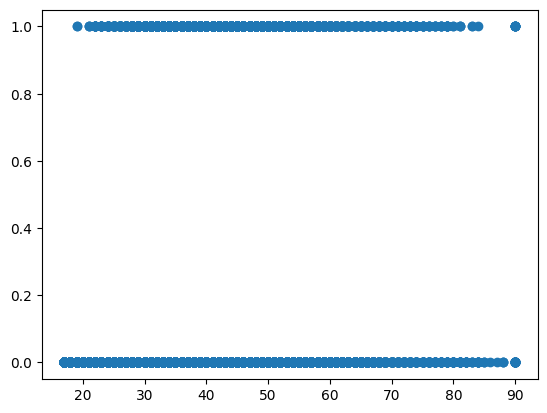

In [8]:
plt.scatter(df.AGE,df.ABOVE50K)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

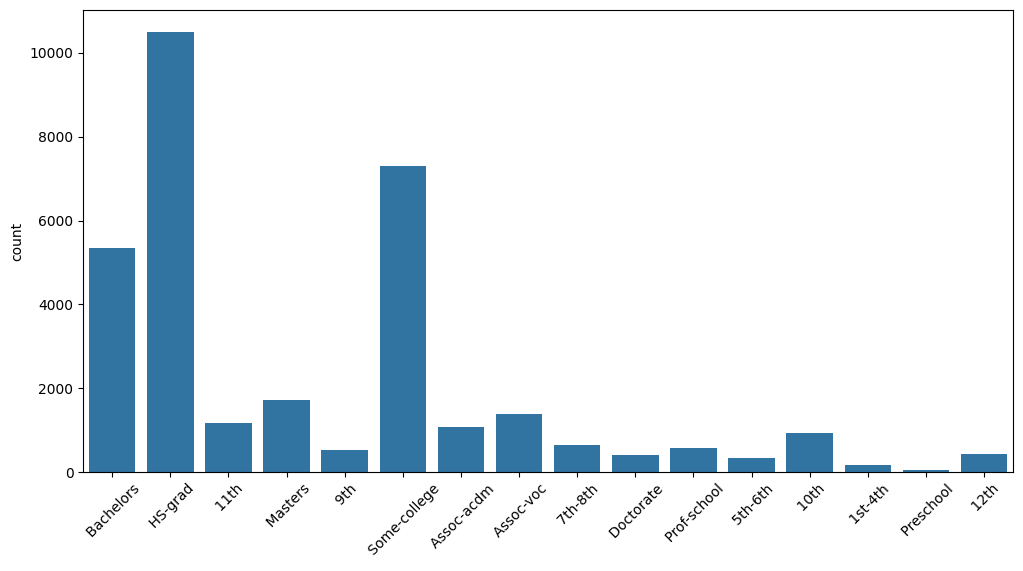

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.EDUCATION.values, data=df)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

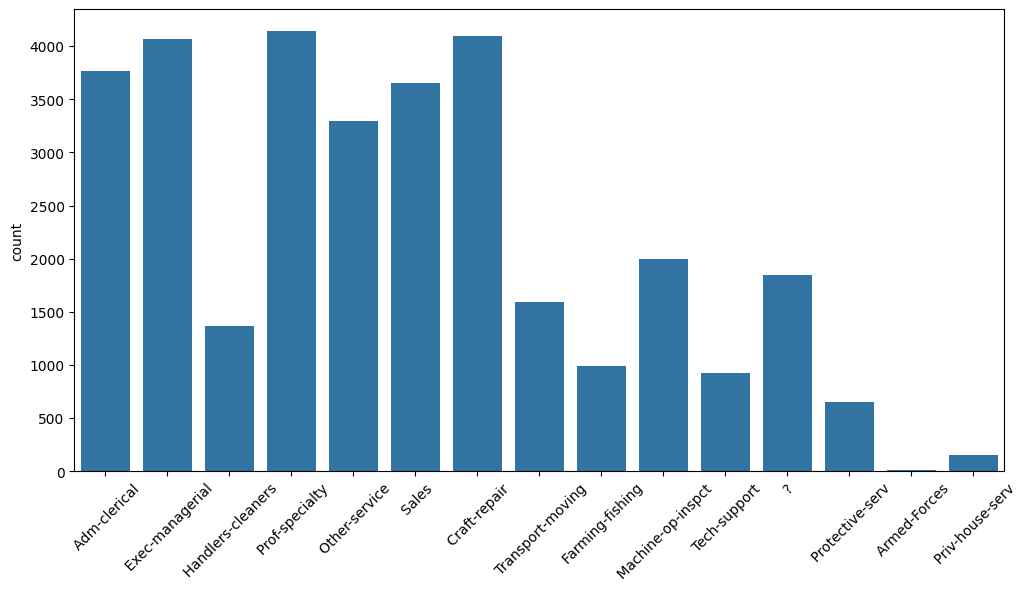

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.OCCUPATION.values, data=df)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-civ-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

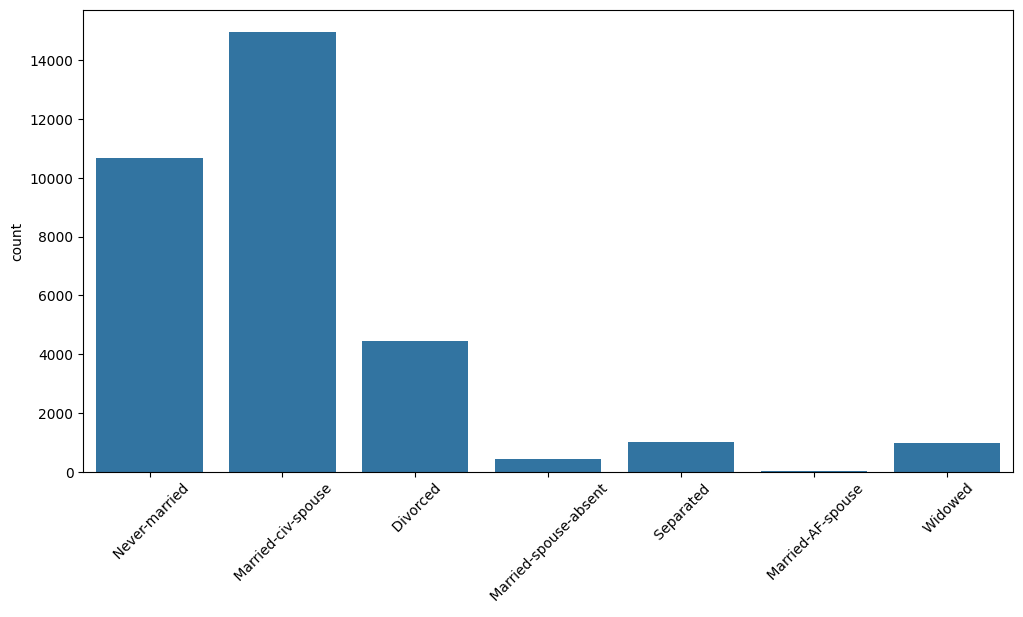

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.iloc[:,5].values, data=df)
plt.xticks(rotation=45)

<Axes: xlabel='AGE', ylabel='Count'>

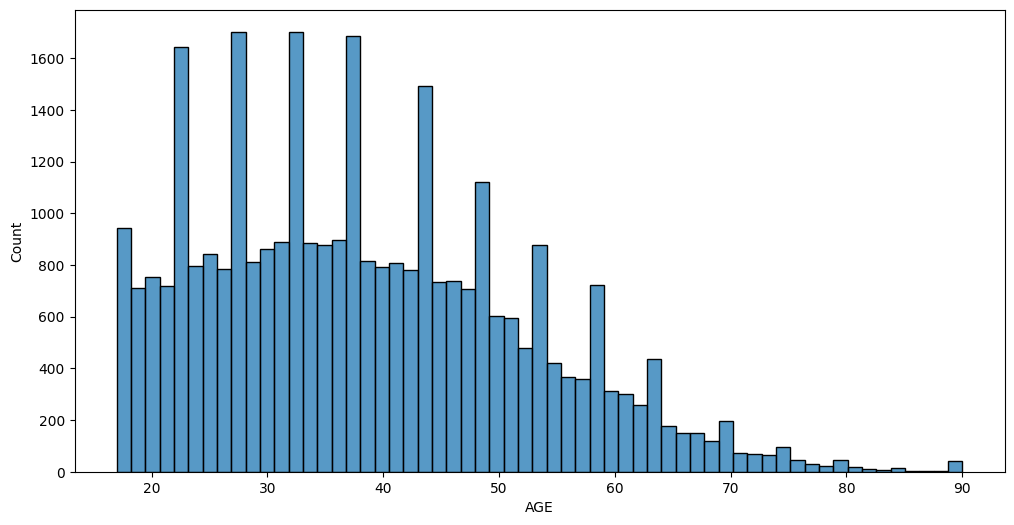

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(df.AGE)

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

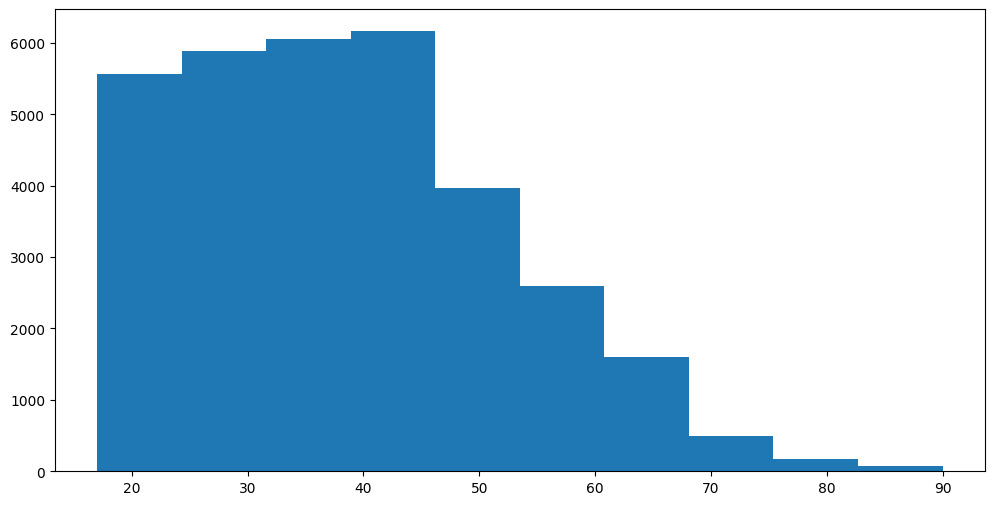

In [21]:
plt.figure(figsize=(12,6))
plt.hist(df.AGE)

In [37]:
# independent variable
x=df[['HOURSPERWEEK']]

# dependent variable
y=df['ABOVE50K']

In [38]:
x.shape

(32561, 1)

In [35]:
y.shape

(32561,)

In [28]:
#split the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=0)

In [29]:
x_train

,HOURSPERWEEK
32098,60
25206,38
23491,50
12367,40
7054,25
...,...
13123,40
19648,35
9845,40
10799,45


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(x_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      7407
           1       0.34      0.04      0.06      2362

    accuracy                           0.75      9769
   macro avg       0.55      0.51      0.46      9769
weighted avg       0.66      0.75      0.66      9769



In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[7247,  160],
       [2278,   84]], dtype=int64)

In [40]:
cm[0,0]

7247

Text(0.5, 1.0, 'Confusion Matrix')

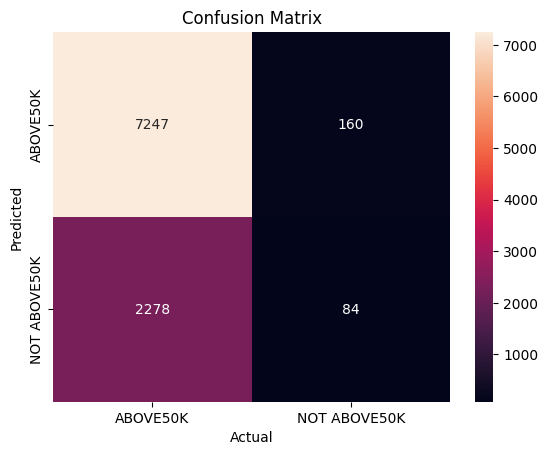

In [43]:
sns.heatmap(cm,annot=True, fmt = 'g', xticklabels=['ABOVE50K','NOT ABOVE50K'],yticklabels=['ABOVE50K','NOT ABOVE50K'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

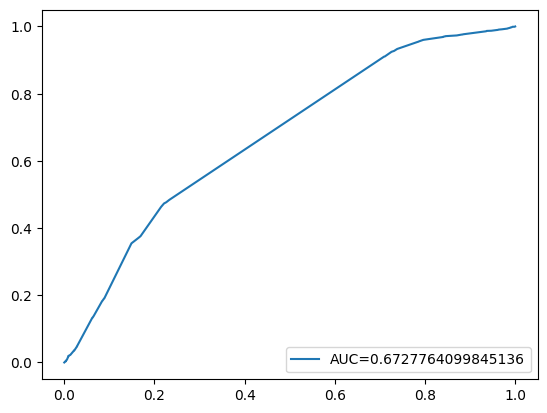

In [49]:
from sklearn import metrics
y_pred_prob= model.predict_proba(x_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_prob)    # fpr=false positive rate , tpr=tru positive rate
auc = metrics.roc_auc_score(y_test,y_pred_prob)
plt.plot(fpr,tpr, label='AUC='+str(auc))
plt.legend(loc=4)